In [81]:
from lenia import Lenia

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
from matplotlib import animation
from IPython.display import HTML
from ipywidgets import interact, widgets
import warnings
import threading

In [82]:
# CONSTANTS
GENS = 300
SMALL_WORLD_SIZE = 32
# BIG_WORLD_SIZE = 64
THREADS = 1  # 'None' to let the system set it for you

# FILENAME = 'pairs.npy'
# WRITE_INTERVAL = 100  # how many sims to run before saving to file

In [83]:
# single world sim returning list of mass
def sim(mu, sigma):

  # normal world
  lenia = Lenia(SMALL_WORLD_SIZE)
  lenia.clear_world()
  lenia.load_cells(0)
  # lenia.multiply_cells(3)
  lenia.add_cells()
  lenia.set_params(kernel_type=0, delta_type=0)
  lenia.set_params(mu=mu, sigma=sigma)
  lenia.calc_kernel()

  mass_list = []
  for i in range(GENS):
      lenia.calc_once()
      mass_list.append(lenia.mass())
      if lenia.mass() == 0:
        break
  
  return mass_list


In [84]:
def sim_wrapper(idx, mu, sigma):
  with lock:
    # print(f"sim {idx} beginning.\tmu: {mu}, sigma: {sigma}")
    print(f"sim {idx} beginning.")
  mass_list = sim(mu, sigma)
  return (idx, mu, sigma, mass_list)

# main

In [85]:
# INPUTS
mu = 0.156
sigma = 0.0224
mu_range_multipliers = (0.7, 1.25)
sigma_range_multipliers = (0.7, 1.25)
num_mu_variations = 20
num_sigma_variations = 20

# CALCULATED VALS
mu_low = mu * mu_range_multipliers[0]
mu_high = mu * mu_range_multipliers[1]
sigma_low = sigma * sigma_range_multipliers[0]
sigma_high = sigma * sigma_range_multipliers[1]
tot_variations = num_mu_variations * num_sigma_variations

# generate a list of mu-sigma pairs to work through
pairs = []
for mu in np.linspace(mu_low, mu_high, num_mu_variations):
  for sigma in np.linspace(sigma_low, sigma_high, num_sigma_variations):
    pairs.append([mu, sigma, []])

In [86]:
# RUN THREADING
import concurrent.futures
import threading
lock = threading.Lock()

In [87]:
# start the futures
exe = concurrent.futures.ThreadPoolExecutor(max_workers=THREADS)
futures = []
for idx in range(len(pairs)):
  pair = pairs[idx]
  (mu, sigma, mass_list) = pair
  futures.append(exe.submit(sim_wrapper, idx, mu, sigma))
  # print(f"submitted variation {idx}")
print("submitted all sim variations to ThreadPoolExecutor")


sim 0 beginning.submitted all sim variations to ThreadPoolExecutor



In [88]:
for future in concurrent.futures.as_completed(futures):
  (idx, mu, sigma, mass_list) = future.result()
  # print(f"sim {idx} done.\t\tmu {mu}, sigma {sigma}, factor {factor}")
  # print(f"sim: {idx} done. mass_list: {mass_list}")
  print(f"sim: {idx} done.")
  pairs[idx][2] = mass_list

sim 1 beginning.sim: 0 done.

sim 2 beginning.sim: 1 done.

sim 3 beginning.sim: 2 done.

sim 4 beginning.sim: 3 done.

sim 5 beginning.sim: 4 done.

sim 6 beginning.sim: 5 done.

sim 7 beginning.sim: 6 done.

sim 8 beginning.sim: 7 done.

sim 9 beginning.sim: 8 done.

sim 10 beginning.sim: 9 done.

sim 11 beginning.sim: 10 done.

sim 12 beginning.sim: 11 done.

sim 13 beginning.sim: 12 done.

sim 14 beginning.sim: 13 done.

sim 15 beginning.sim: 14 done.

sim 16 beginning.sim: 15 done.

sim 17 beginning.sim: 16 done.

sim 18 beginning.sim: 17 done.

sim 19 beginning.sim: 18 done.

sim 20 beginning.sim: 19 done.

sim 21 beginning.sim: 20 done.

sim 22 beginning.sim: 21 done.

sim 23 beginning.sim: 22 done.

sim 24 beginning.sim: 23 done.

sim 25 beginning.sim: 24 done.

sim 26 beginning.sim: 25 done.

sim 27 beginning.sim: 26 done.

sim 28 beginning.sim: 27 done.

sim 29 beginning.sim: 28 done.

sim 30 beginning.sim: 29 done.

sim 31 beginning.sim: 30 done.

sim 32 beginning.sim: 31 do

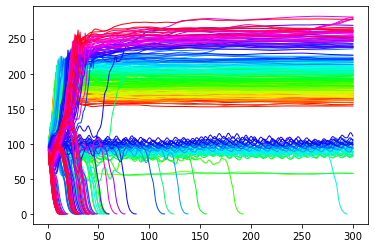

In [89]:
### SHOW PLOT

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
cmap = get_cmap(tot_variations)

fig, ax = plt.subplots()

x = np.arange(1,GENS+1)
for idx, pair in enumerate(pairs):
  mass_list = pair[2]
  x = np.arange(1,len(mass_list)+1)
  line, = ax.plot(x, mass_list, lw=1, c=cmap(idx))

plt.show()